## 探索数据分析项目 - 链家二手房交易信息探索与分析

项目分析目标：利用数据分析工具和对数据的理解，根据给定房屋信息，研究房型结构/房龄/面积/成交时间的集中分布趋势以及对成交价格的影响，据此来制作定价策略。

In [304]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 10
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False

### 导入数据

In [2]:
df = pd.read_excel("bjlianjia.xlsx",0,header = None)

In [3]:
columns = ["房型","成交时间","地址","价格","朝向","装修","建造年代","楼层","产权","面积","得房面积","是都有钥匙","编号"]
df.columns = columns

In [4]:
df.head()

,房型,成交时间,地址,价格,朝向,装修,建造年代,楼层,产权,面积,得房面积,是都有钥匙,编号
0,3室1厅1厨1卫,2016.08.30 链家成交,人定湖北巷,750.0,东南 北,简装,1984,中楼层 (共6层),70年,77.5㎡,暂无数据,无,101100406614
1,2室1厅1厨1卫,2016.07.31 链家成交,刘家窑东里,343.0,南 西,精装,1998,高楼层 (共18层),70年,75㎡,暂无数据,有,101091748516
2,3室1厅1厨1卫,2017.02.17 链家成交,兰园,640.0,南 北,简装,1998,中楼层 (共6层),70年,88.1㎡,暂无数据,无,101101151051
3,2室1厅1厨1卫,2017.02 其他公司成交,科育小区,NaN,南 北,精装,1975,顶层 (共4层),70年,66.69㎡,50.03㎡,无,101100278245
4,3室1厅1厨1卫,2016.09.15 链家成交,中纺宿舍,925.0,东南,简装,未知,低楼层 (共18层),70年,108.86㎡,暂无数据,有,101100449527


### 理解和探索数据

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147170 entries, 0 to 147169
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   房型      147169 non-null  object 
 1   成交时间    147164 non-null  object 
 2   地址      146770 non-null  object 
 3   价格      99424 non-null   float64
 4   朝向      147169 non-null  object 
 5   装修      147169 non-null  object 
 6   建造年代    147164 non-null  object 
 7   楼层      147169 non-null  object 
 8   产权      147169 non-null  object 
 9   面积      147169 non-null  object 
 10  得房面积    147169 non-null  object 
 11  是都有钥匙   147169 non-null  object 
 12  编号      147169 non-null  object 
dtypes: float64(1), object(12)
memory usage: 14.6+ MB


In [5]:
df.dtypes

房型        object
成交时间      object
地址        object
价格       float64
朝向        object
装修        object
建造年代      object
楼层        object
产权        object
面积        object
得房面积      object
是都有钥匙     object
编号        object
dtype: object

In [248]:
df['房型'].value_counts()

2室1厅1厨1卫    49814
1室1厅1厨1卫    26057
- -室- -厅    18216
3室1厅1厨1卫    13087
3室2厅1厨2卫    10019
            ...  
2室2厅2厨3卫        1
8室2厅1厨4卫        1
3室1厅0厨3卫        1
6室0厅0厨2卫        1
6室5厅1厨5卫        1
Name: 房型, Length: 240, dtype: int64

### 数据处理和清洗

#### 房型结构数据清洗

In [246]:
room = []
for i in range(len(df['房型'])):
    try:
        s = df.loc[i,'房型'].strip(" ")
        if len(s)==8:
            room.append([df.loc[i,'房型'][0],
                      df.loc[i,'房型'][2],
                      df.loc[i,'房型'][4],
                      df.loc[i,'房型'][6]])
        else:
            room.append([-1,-1,-1,-1])
    except:
        room.append([-1,-1,-1,-1])
df_room = pd.DataFrame(room,columns = ["室","厅","厨","卫"])
df_room.replace({'-':-1},inplace=True)

In [254]:
df_room

,室,厅,厨,卫
0,3,1,1,1
1,2,1,1,1
2,3,1,1,1
3,2,1,1,1
4,3,1,1,1
...,...,...,...,...
147165,1,1,1,1
147166,1,1,1,1
147167,-1,-1,-1,-1
147168,2,1,1,1


#### 房型朝向处理

In [483]:
def _parseCX(s):
    try:
        s = s.strip()
        return s.split(" ")
    except:
        return ["unknown"]
df_cx= df['朝向'].apply(lambda s : _parseCX(s)).values.tolist()
df_cx

[['东南', '北'],
 ['南', '西'],
 ['南', '北'],
 ['南', '北'],
 ['东南'],
 ['东南', '北'],
 ['南', '北'],
 ['南', '北'],
 ['东', '西'],
 ['东南'],
 ['南'],
 ['南', '北'],
 ['西南'],
 ['南'],
 ['南', '北'],
 ['西'],
 ['南', '北'],
 ['西南'],
 ['南', '北'],
 ['南'],
 ['南', '北'],
 ['南'],
 ['西'],
 ['东', '西'],
 ['东'],
 ['东'],
 ['南', '北'],
 ['南'],
 ['南'],
 ['西'],
 ['南'],
 ['东'],
 ['南', '北'],
 ['东北'],
 ['西'],
 ['南', '西', '北'],
 ['东', '西'],
 ['南', '北'],
 ['东', '西'],
 ['西北'],
 ['南', '北'],
 ['南', '北'],
 ['南'],
 ['西南'],
 ['南', '西', '北'],
 ['南', '北'],
 ['东南'],
 ['南', '北'],
 ['南', '北'],
 ['南', '北'],
 ['南', '北'],
 ['东南'],
 ['西南'],
 ['南'],
 ['南'],
 ['东', '西'],
 ['南', '北'],
 ['南', '北'],
 ['南', '北'],
 ['东', '西'],
 ['北'],
 ['北'],
 ['西南'],
 ['东'],
 ['东北'],
 ['南', '西'],
 ['西南'],
 ['南', '北'],
 ['南', '北'],
 ['unknown'],
 ['西'],
 ['南'],
 ['南'],
 ['东'],
 ['东', '西'],
 ['东南'],
 ['南', '北'],
 ['南', '北'],
 ['南'],
 ['南', '北'],
 ['西'],
 ['西'],
 ['南', '北'],
 ['南'],
 ['南', '北'],
 ['南', '北'],
 ['东南'],
 ['西南'],
 ['东'],
 ['南'],
 ['东'],
 ['南'],
 ['南', '北'],
 [

#### 成交日期时间提取

In [41]:
import re
def _parseDate(s):
    try:
        p = re.compile("[\d\.]+")
        return p.findall(s)[0]
    except:
        return '-1.-1.-1'
df_date = df['成交时间'].apply(lambda s : _parseDate(s))

df_date = pd.DataFrame(df_date.apply(lambda s : s.split(".")).values.tolist(),columns = ['年','月','日'])

df_date.fillna(-1,inplace = True)
df_date

,年,月,日
0,2016,08,30
1,2016,07,31
2,2017,02,17
3,2017,02,-1
4,2016,09,15
...,...,...,...
147165,2013,09,13
147166,2013,10,-1
147167,2013,09,-1
147168,2013,10,-1


#### 面积与产权年代清洗和处理

In [42]:
def _parseArea(s):
    try:
        p = re.compile("[\d\.]+")
        return p.findall(s)[0]
    except:
        return -1

df_mj = df["面积"].apply(lambda s : _parseArea(s))
df_cq = df["产权"].apply(lambda s : _parseArea(s))

In [43]:
df_mj

0           77.5
1             75
2           88.1
3          66.69
4         108.86
           ...  
147165     75.17
147166     75.47
147167    145.97
147168     57.21
147169    116.91
Name: 面积, Length: 147170, dtype: object

In [44]:
df_cq

0         70
1         70
2         70
3         70
4         70
          ..
147165    70
147166    70
147167    70
147168    70
147169    70
Name: 产权, Length: 147170, dtype: object

### 二手房交易数据可视化探索分析

#### 房型结构探索

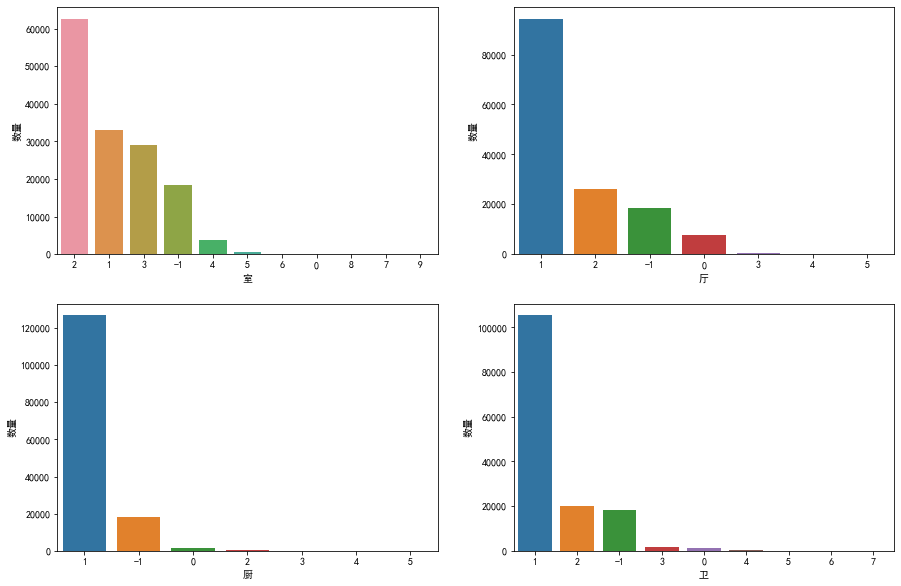

In [65]:
fig, axes = plt.subplots(2,2) 
ax0, ax1, ax2, ax3 = axes.flatten()

for ax,col in zip(axes.flatten(),df_room.columns):
    temp = df_room[col].value_counts().reset_index().rename(columns = {'index':col,col:"数量"})
    sns.barplot(x = col,y ="数量" ,data = temp,ax= ax)

分析结论：在这份二手房交易数据中，绝大部分都是1-3个卧室，客厅1-2个，1个厨房和1-2个卫生间的房型结构

#### 探索最多人成交的房型结构

Text(0, 0.5, '数量')

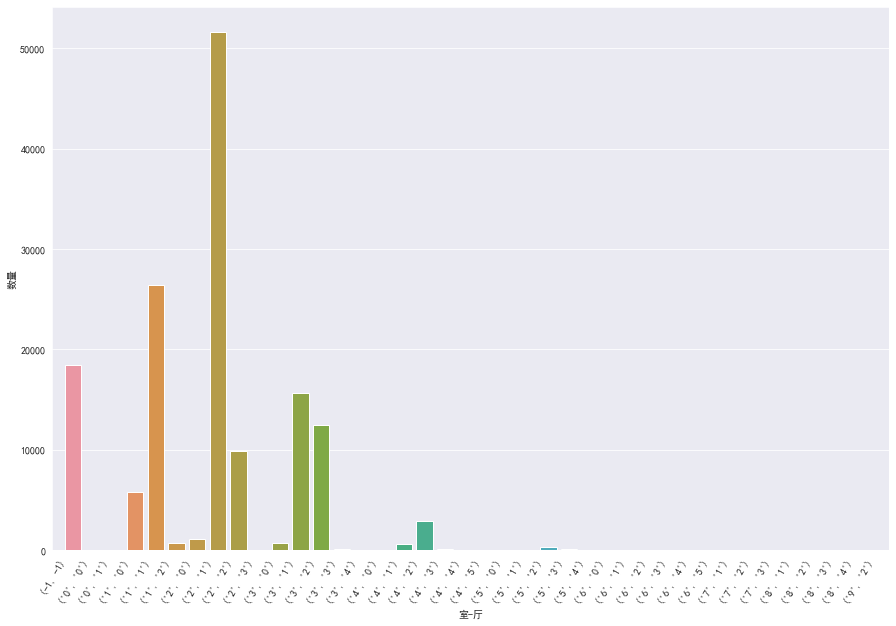

In [368]:
grouped_room = df_room.groupby(["室","厅"]).count()
sns.barplot(x= grouped_room.index,y="厨",data=grouped_room)
plt.xticks(range(-1,39),grouped_room.index,rotation=60)
plt.xlabel("室-厅")
plt.ylabel("数量")

分析结论：在所有交易的房型结构中，一室一厅和两室一厅的房型占总成交量大头，其中两室一厅的房型结构达到了5万套以上的成交量。其次三室一厅和三室两厅的房型成交量也在15000套左右，而其他房型结构很少人会购买。

#### 分析成交价格的集中趋势

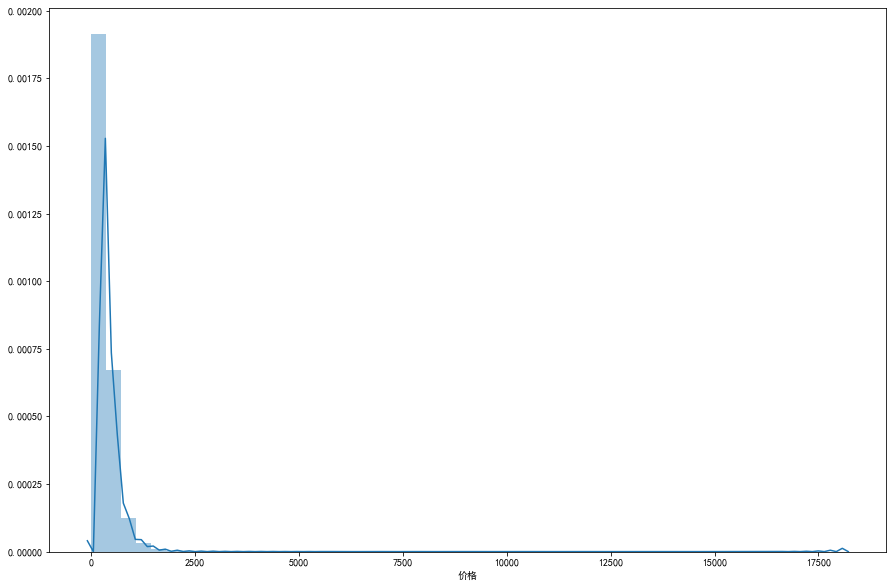

In [66]:
sns.distplot(df['价格'].fillna(0))

根据直方图可以看到，二手房的主要成交价格走势大多分布在2500万的区间内，但也有个别极端房价的成交价格在17500万的，拉大了整体价格数据的分布。

#### 连续特征离散化，查看成交价格分布

In [519]:
pd.cut(df['价格'].fillna(0),bins = 100)

0          (725.2, 906.5]
1          (181.3, 362.6]
2          (543.9, 725.2]
3         (-18.13, 181.3]
4         (906.5, 1087.8]
               ...       
147165     (362.6, 543.9]
147166    (-18.13, 181.3]
147167    (-18.13, 181.3]
147168    (-18.13, 181.3]
147169     (543.9, 725.2]
Name: 价格, Length: 147170, dtype: category
Categories (100, interval[float64]): [(-18.13, 181.3] < (181.3, 362.6] < (362.6, 543.9] < (543.9, 725.2] ... (17404.8, 17586.1] < (17586.1, 17767.4] < (17767.4, 17948.7] < (17948.7, 18130.0]]

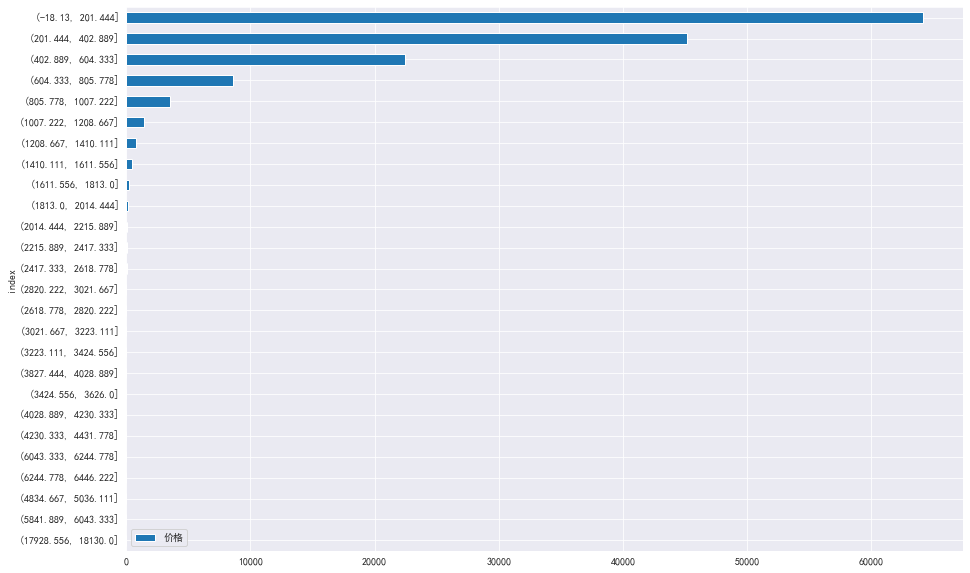

In [517]:
cut_price = pd.cut(df['价格'].fillna(0),bins = 90).value_counts()
cut_price  = pd.DataFrame(cut_price[cut_price > 0]).reset_index()
cut_price.sort_values(['价格']).plot.barh(x= 'index',y='价格')
# plt.xticks(range(-1,28),cut_price['index'].values,rotation=60)

通过直方图，将连续价格切分，能更直观的分析出成交价格主要集中在600万以内，其中人们购买200万以内价格的二手房数量最多，有6万多套，其次是200万到600万的二手房型，这突显出了人们买房的价格趋势

#### 成交时间的走势分布

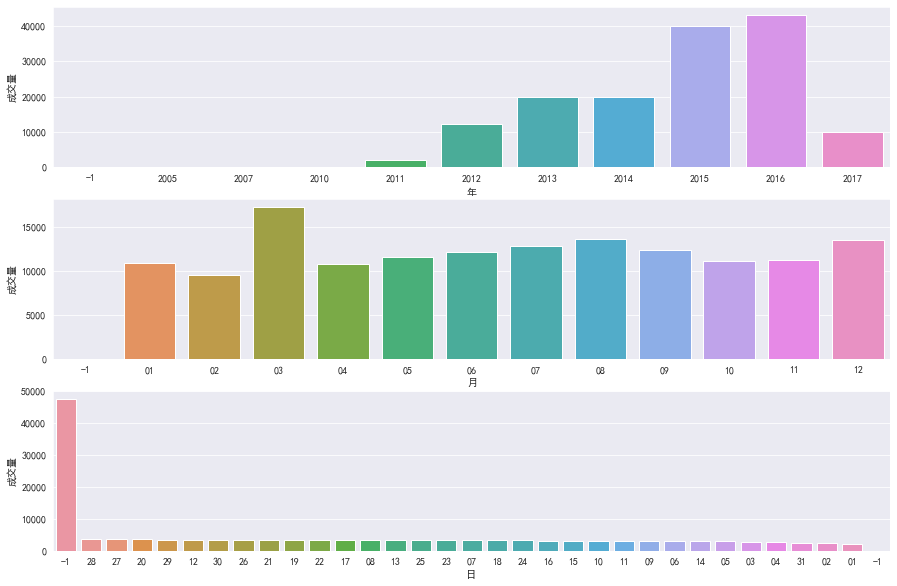

In [536]:
fig, axes = plt.subplots(3,1) 
ax0, ax1, ax2 = axes.flatten()

for ax,col in zip(axes.flatten(),date_df.columns):
    temp_data = date_df[col].value_counts().reset_index().rename(columns = {'index':col,col:"成交量"})
    sns.barplot(x = col,y ="成交量" ,data = temp_data,ax= ax)

按年份、月份和日期分别对二手房成交量进行可视化走势分布，可以看到2011-2014年二手房交易量不断上涨，到了2015年和2016年二手房交易量进入到了高峰期，到了2017年成交量开始极速猛降。在月份的成交量分布中，除了2月份成交量较少外在年后几乎每个月的成交量都在10000套以上。

#### 探索房屋面积集中分布

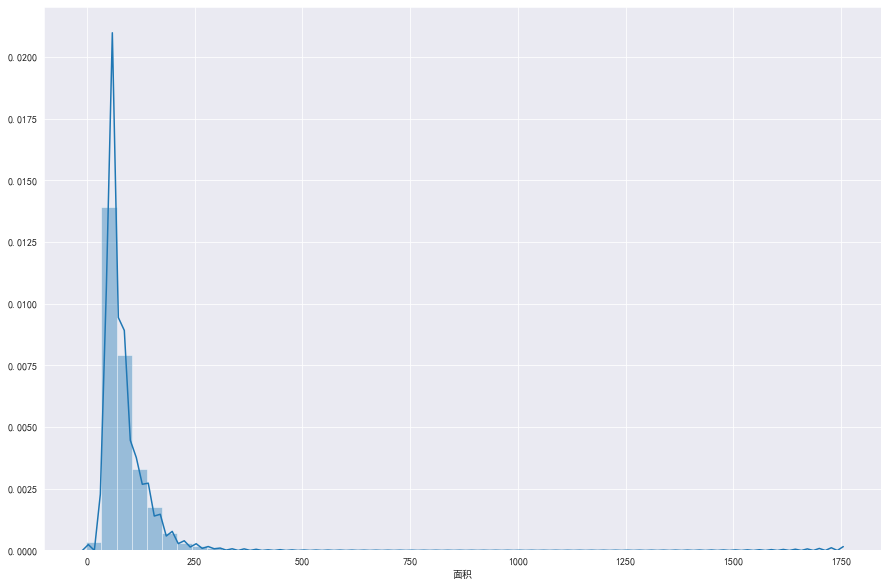

In [103]:
sns.distplot(df["面积"].apply(lambda s : _parseArea(s)).astype("float16"))

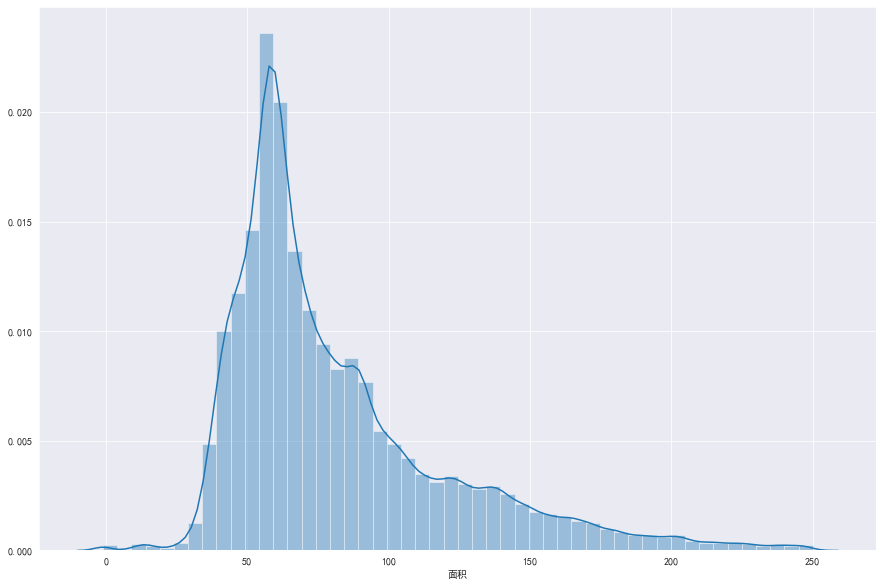

In [104]:
area = df["面积"].apply(lambda s : _parseArea(s)).astype("float16")
area = area[area<=250]
sns.distplot(area,bins = 50)

在房屋面积直方分布图中，能够看出北京市大部分交易的二手房型面积都在50到90平米之间，平均房型面积在60-70平米左右

#### 成交价格与房屋面积的相关性

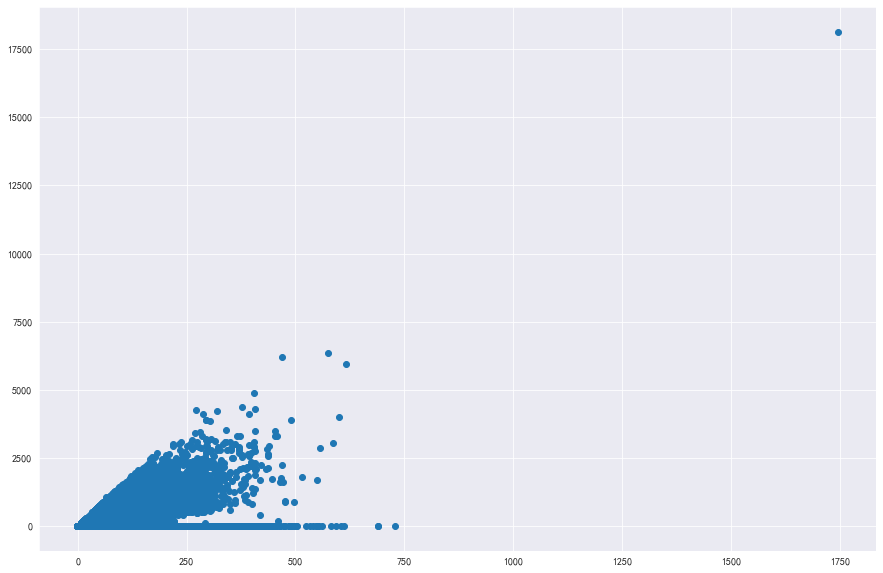

In [105]:
plt.scatter(df["面积"].apply(lambda s : _parseArea(s)).astype("float16").values,df['价格'].fillna(0).values)

从线性关系图可以看出，房屋面积与成交价格在整体上呈现出正相关的关系，但由于成交价格存在极大异常值，所以剔除异常值的影响

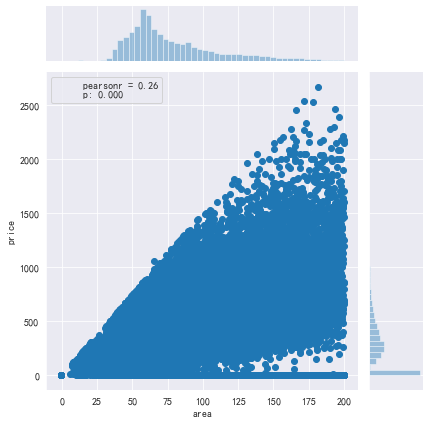

In [542]:
from scipy import stats
area_price = pd.DataFrame(list(zip(df["面积"].apply(lambda s : _parseArea(s)).astype("float16").values,df['价格'].fillna(0).values)),columns = ['area','price'])
area_price = area_price.loc[area_price['area'] <= 200 ]
def pearson(x,y):
    return stats.pearsonr(x,y)
g = sns.jointplot(x = "area",y = "price",data = area_price)
g.annotate(pearson,template='pearsonr = {val:.2f}\np: {p:.3f}')

在剔除了极大值的影响后，对成交价格在200万以内的的房屋面积进行可视化相关性分析，结果发现皮尔逊系数只有0.26，这说明房屋面积和成交价格之间并没有很强的相关性，肯定也受到房型、朝向、建造年代、房屋地址等众多因素的影响。

#### 房屋建造年龄集中分布趋势

(array([9.4100e+02, 3.2480e+03, 6.0350e+03, 1.5794e+04, 1.4329e+04,
        1.4461e+04, 1.0758e+04, 1.3762e+04, 7.0950e+03, 7.5750e+03,
        8.0250e+03, 1.1408e+04, 6.6800e+03, 6.0150e+03, 4.7640e+03,
        5.5490e+03, 1.4740e+03, 6.6900e+02, 5.3000e+02, 2.0100e+02,
        2.4900e+02, 2.0800e+02, 3.4400e+02, 1.4400e+02, 2.2400e+02,
        2.3100e+02, 2.1600e+02, 5.5000e+01, 1.4000e+01, 1.0000e+01]),
 array([ 0.       ,  2.2666667,  4.5333333,  6.8      ,  9.066667 ,
        11.333333 , 13.6      , 15.866667 , 18.133333 , 20.4      ,
        22.666666 , 24.933332 , 27.2      , 29.466667 , 31.733334 ,
        34.       , 36.266666 , 38.533333 , 40.8      , 43.066666 ,
        45.333332 , 47.6      , 49.866665 , 52.133335 , 54.4      ,
        56.666668 , 58.933334 , 61.2      , 63.466667 , 65.73333  ,
        68.       ], dtype=float32),
 <a list of 30 Patch objects>)

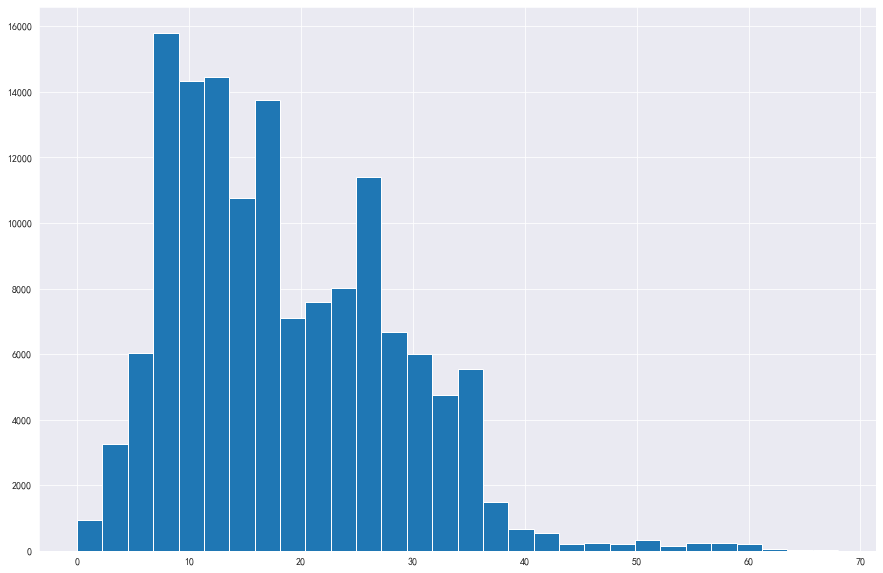

In [107]:
diff_year = date_df['年'].astype("int16") - df['建造年代'].apply(lambda s : str(s).strip()).replace({"未知":-1}).fillna(-1).astype("float16")
diff_year = diff_year [(diff_year >= 0) &(diff_year < 70)]
plt.hist(diff_year.values,bins = 30)

通过直方图绘制二手房成交时间和建造时间之差，可以直观的看出大部分有过成交的房屋建造年龄都集中在10来年左右，也有少数成交的房龄在20到30几年的老房区，而建造时间在6年以下的新房成交量更少，可能是因为现在房价太贵的原因，很少人会愿意买房龄较小的新房。

In [388]:
df['价格'].fillna(0).describe()

count    147170.000000
mean        274.918017
std         297.114332
min           0.000000
25%           0.000000
50%         240.000000
75%         410.000000
max       18130.000000
Name: 价格, dtype: float64

#### 房龄年限的分布趋势

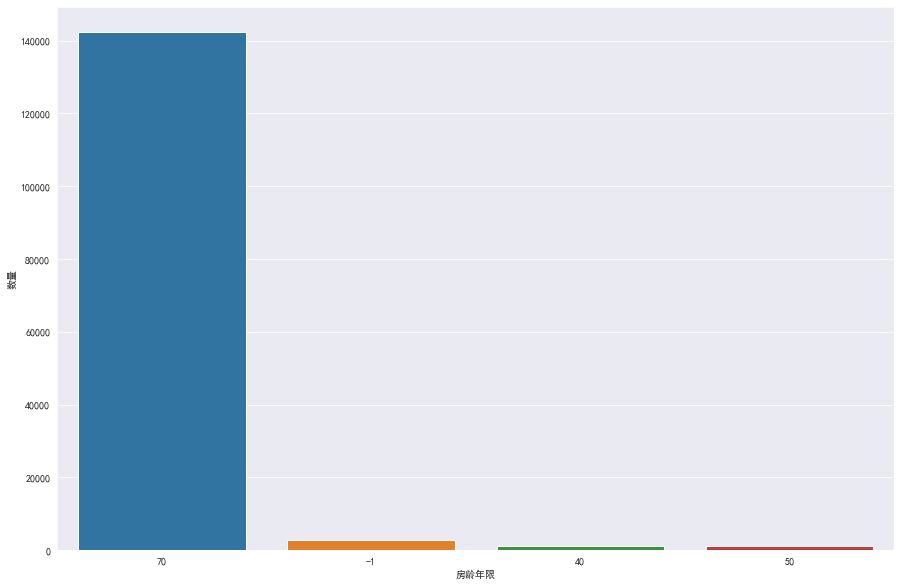

In [412]:
df_cq = df_cq.value_counts().reset_index().rename(columns = {'index':'房龄年限','产权':'数量'})
sns.barplot(x = '房龄年限',y = '数量',data=df_cq)

在房龄年限分布的对比上，70年产权的住宅楼是人们最主要购买的目标房型，人们几乎很少愿意购买40年和50年产权的商品房